In [66]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Ejercicio 1:

In [67]:
# Guardar dataframe en df
df = pd.read_csv('vacunaciones.csv')

## Apartado 1:

Se puede comprobar que hay varios datos que no aparecen en el dataset (ya sea porque se han perdido o no se tomaron en su momento) y aparecen como NaN.

Lo primero es reducir el número de "missing values" de la columna "people vaccinated"". Para ello, se hará la media de los 3 días anteriores (dos o uno en los primeros días) y se incluirá en dicha celda.
*Nota: EL programa asume que los datos son introducidos diariamente, por lo que la media se hace con los 3 datos anteriores. Se hace un check para comprobar que los tres datos anteriores pertenecen al mismo país.

Aquí se pueden ver algunos de esos "missing values" (en la fila 1 por ejemplo).

In [68]:
df.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [83]:
# Comprobador de nan y corregidor:
n = df.shape[0]
for i in range(n-1, -1, -1):
    country = df.at[i, 'country']
    suma = 0;
    num_media = 0;
    
    if pd.isna(df.at[i, 'people_vaccinated']) :
            if i == 1:
                df.at[i, 'people_vaccinated'] = df.at[i-1, 'people_vaccinated']
            elif i == 2:
                df.at[i, 'people_vaccinated'] =  (df.at[i-1, 'people_vaccinated'] + df.at[i-2, 'people_vaccinated'])/2
            else:
                #Para casos mayores que el índice 2
                if (df.at[i-1, 'country'] == country and not pd.isna(df.at[i-1, 'people_vaccinated'])):
                    suma = suma +  df.at[i-1, 'people_vaccinated']
                    num_media+=1
                if (df.at[i-2, 'country'] == country and not pd.isna(df.at[i-2, 'people_vaccinated'])):
                    suma =  suma + df.at[i-2, 'people_vaccinated']
                    num_media+=1
                if (df.at[i-3, 'country'] == country and not pd.isna(df.at[i-2, 'people_vaccinated']) ):
                    suma =  suma + df.at[i-3, 'people_vaccinated']
                    num_media+=1
                if num_media >= 1:
                    df.at[i, 'people_vaccinated'] = round(suma / num_media)
                else:
                    df = df.drop(df.index[i])

df.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.000000,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,0.000000,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.000000,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.000000,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.000000,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.000000,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.000000,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.000000,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.000000,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.000000,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


Rellenar estos datos simplemente es para no tener ningun error en futuros analisis del dataset. En este caso, tenemos la columna de las personas vacunadas.

Es obvio que no se pueden tener 531.444444 personas vacunadas, pero para que no se alteren los datos, tiene que quedar asi (respecto a la media por ejemplo).

 Por si acaso, contar los valores nan que queden

In [80]:
c = 0
for i in range(df.shape[0]):
    if  pd.isna(df.at[i, 'people_vaccinated']):
        c = c +1
print(c)

3208
0


## Apartado 2:

Ahora, se quiere saber los países que más días estuvieron vacunando para comparar su evolución a través del tiempo (los 5 países con más días vacunando gente) y mirar cuál ha sido el país con mejor plan de vacunación.

Necesitamos la columna daily_vaccinations y contar los días

In [8]:
# Una lista con los países en el dataset
paises = df['country'].unique()
paises

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'England',
       'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany',
       'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius',
       'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
       'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia', 'Saint Helena', 'Saudi Arabia', 'Scotland',
       'Serbia', 'Seychelles',

Se puede observar que dentro del dataset hay países que son partes de otros países. En el caso de 'England', 'Scotland', 'Wales'y 'Northern Ireland'; todos forman parte de "United Kingdom". Por otra parte está el caso de 'Northern Cyprus', que forma parte de 'Cyprus'. Esto se ha de tener en cuenta a la hora de analizar los datos.

Antes de tomar cualquier tipo de decisión, se tienen que ver los datos:

In [9]:
# El número de veces que se repite el país en el dataset
valores = df['country'].value_counts()
valores['Albania']

31

Para contar los días trabajados, se hará un buucle for que recorrerá el dataframe mirando las personas vacunadas en ese día (porque si se han vacunado personas, se ha trabajado)

In [10]:
# Comprobar cuantos días se trabajaron en total
columna = 'daily_vaccinations'
filas_con_valor = df[columna].notna().sum()
filas_con_valor

3083

In [11]:
# Contar los días trabajados por país.
dias_trabajados = []
c = 0
contador = 0
for i in range(len(paises)):
  c = 0
  for j in range(valores[paises[i]]):    #aquí se ven las veces repetidas del país en el dataframe

    if pd.notna(df.at[j + contador, 'daily_vaccinations']): #en este if, van entrando los valores distintos a NaN
      c = c + 1
  contador = contador + valores[paises[i]]
  dias_trabajados.append(c)
contador = 0
dias_trabajados
suma = sum(dias_trabajados)
suma


3083

Una vez se saben los días más trabajados, se van a ver cuales son los países que representan esos datos.

In [12]:
# Orden de los países
paises_ordenados = sorted(dias_trabajados, reverse = True)
cinco_mas_altos = paises_ordenados[:5]
posiciones = [[i for i, x in enumerate(dias_trabajados) if x == valor] for valor in cinco_mas_altos]
posiciones

[[26, 61, 74, 87, 89],
 [26, 61, 74, 87, 89],
 [26, 61, 74, 87, 89],
 [26, 61, 74, 87, 89],
 [26, 61, 74, 87, 89]]

Parece ser que hay empate entre los países 26, 61, 74, 87 y 89. A ver de qué países se trata.

In [13]:
for i in range(len(posiciones[0])):
  print("País nº", i+1, "es:", paises[posiciones[0][i]])

País nº 1 es: England
País nº 2 es: Northern Ireland
País nº 3 es: Scotland
País nº 4 es: United Kingdom
País nº 5 es: Wales


Parece que, lo que se ha visto anteriormente está afectando a los datos. Por lo visto, los reinos de Reino Unido son los países con más días trabajados. ¿Puede ser que tengan los mismos datos y afecte al estudio de los países? Vamos a comprobarlo.

In [14]:
# Vamos a mirar el numero de personas vacunadas totales por cada país. Igual el reino unido es la suma del resto.

vacunados = []
contador = 0
for i in range(len(paises)):
  c = 0
  for j in range(valores[paises[i]]):    #aquí se ven las veces repetidas del país en el dataframe
    c = df['people_fully_vaccinated'][contador + j]
  contador = contador + valores[paises[i]] #tiene que ser +1 para obtener el siguiente, sino cuando j=0 obtiene la misma casilla que la anterior
  vacunados.append(c)


In [15]:
# Veamos el numero de vacunados
for i in range(len(posiciones[0])):
  print("País nº", i+1, "es:", paises[posiciones[0][i]],". Ha vacunado a:", vacunados[posiciones[0][i]])

País nº 1 es: England . Ha vacunado a: 490722.0
País nº 2 es: Northern Ireland . Ha vacunado a: 29005.0
País nº 3 es: Scotland . Ha vacunado a: 14501.0
País nº 4 es: United Kingdom . Ha vacunado a: 539630.0
País nº 5 es: Wales . Ha vacunado a: 5402.0


In [16]:
490722.0 + 29005.0 +14501.0 + 5402.0

539630.0

Parece ser que han cogido los 4 países y los han sumado en el Reino Unido. Por lo tanto, se elimina el Reino unido y se sigue con el estudio.

Dataframe sin UK.

In [17]:
# Se elimina United kingdom.
mascara = df['country'] == 'United Kingdom'
df2 = df[~mascara]

# Filas sin limite
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Con limite
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)


df2 = df2.reset_index(drop=True)
df2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,0.0,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,Wales,NaN,2021-02-10,687892.0,684097.0,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3140,Wales,NaN,2021-02-11,719954.0,715944.0,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3141,Wales,NaN,2021-02-12,753669.0,749445.0,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3142,Wales,NaN,2021-02-13,776224.0,771651.0,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [18]:
# Una lista con los países en el dataset
paises2 = df2['country'].unique()
paises2

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Argentina',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Bermuda', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'England',
       'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany',
       'Gibraltar', 'Greece', 'Greenland', 'Guernsey', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jersey', 'Kuwait', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Mauritius',
       'Mexico', 'Monaco', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands',
       'Northern Cyprus', 'Northern Ireland', 'Norway', 'Oman',
       'Pakistan', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russia', 'Saint Helena', 'Saudi Arabia', 'Scotland',
       'Serbia', 'Seychelles',

In [19]:
# El número de veces que se repite el país en el dataset
valores2 = df2['country'].value_counts()
valores2

Scotland            64
England             64
Northern Ireland    64
Wales               64
Israel              59
                    ..
Iran                 2
Cambodia             2
Algeria              2
Greenland            1
Saint Helena         1
Name: country, Length: 89, dtype: int64

In [20]:
# Comprobar días trabajados totales
columna = 'daily_vaccinations'
filas_con_valor2 = df2[columna].notna().sum()
filas_con_valor2

3020

In [23]:
# Contar los días trabajados por país.
dias_trabajados2 = []
c2 = 0
contador2 = 0
for i in range(len(paises2)):
  c2 = 0
  for j in range(valores2[paises2[i]]):    #aquí se ven las veces repetidas del país en el dataframe

    if pd.notna(df2.at[j + contador2, 'daily_vaccinations']): #en este if, van entrando los valores distintos a NaN
      c2 = c2 + 1
  contador2 = contador2 + valores2[paises2[i]]
  dias_trabajados2.append(c2)

dias_trabajados2
suma2 = sum(dias_trabajados2)
suma2

3020

Ambos indican que hay 3020 días que se han trabajado en total, por lo que se ha hecho bien. Ahora se ordenan los países

In [24]:
# Orden de los países
paises_ordenados2 = sorted(dias_trabajados2, reverse = True)
cinco_mas_altos2 = paises_ordenados2[:5]
posiciones2 = [[i for i, x in enumerate(dias_trabajados2) if x == valor] for valor in cinco_mas_altos2]
posiciones2

[[26, 61, 74, 88], [26, 61, 74, 88], [26, 61, 74, 88], [26, 61, 74, 88], [43]]

In [25]:
# Ver el numero de países y qué países
valores_unicos = []

for sublista in posiciones2:
    for valor in sublista:
        if valor not in valores_unicos:
            valores_unicos.append(valor)

for i in range(len(valores_unicos)):
  print("País nº", i+1, "es:", paises2[valores_unicos[i]])

País nº 1 es: England
País nº 2 es: Northern Ireland
País nº 3 es: Scotland
País nº 4 es: Wales
País nº 5 es: Israel


Parece ser que los países que mejor se han organizado para el tema de las vacunas son los que forman el Reino Unido. Probablemente sea porque tendrán una manera de vida parecida y organizada para organizar este tipo de sucesos.

Es importante resaltar que se están comparando los días en los cuales se ha vacunado gente, no el numero total de vacunados, porque si se compara Gales con Francia, por ejemplo, se obtiene que en Francia se ha vacunado a más gente.

Una vez se tienen los países que más han días han vacunado, se va a realizar un diagrama para ver cual ha sido el más constante. Para ello se comparará el número de vacunas diarias a medida que pasa el tiempo.

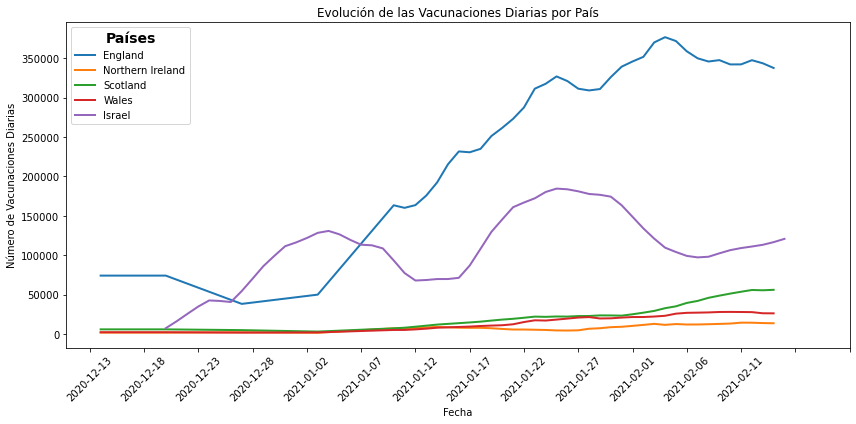

In [84]:
# Pintar la grafica de los países
countries_of_interest = ['England', 'Northern Ireland', 'Scotland', 'Wales', 'Israel']
filtered_df = df[df['country'].isin(countries_of_interest)]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for i, country in enumerate(countries_of_interest):
    country_data = filtered_df[filtered_df['country'] == country]
    plt.plot(country_data['date'], country_data['daily_vaccinations'], label=country, linewidth=2)

plt.title('Evolución de las Vacunaciones Diarias por País')
plt.xlabel('Fecha')
plt.ylabel('Número de Vacunaciones Diarias')
plt.xticks(range(0,75, 5)) 
plt.xticks(rotation=45)

# Ajustando la leyenda
legend = plt.legend(title='Países', loc='upper left')
plt.setp(legend.get_title(), fontsize='14', fontweight='bold', color='black')
plt.tight_layout()
plt.show()

Por lo que se puede ver, Inglaterra e Israel han realizado bastantes vacunaciones, pero de manera irregular. Al comienzo se hicieron pocas, pero luego se fueron haciendo más (en el caso de Israel tuvo picos a comienzos de 2021 y alrededor de comienzos de febrero de ese mismo año).

Parece ser que cuando empezó 2021, Israel estaba en una situación critica del virus y, debido a esto, se hicieron procesos de vacunación masiva tanto en enero como en febrero. Además, respecto a la política, Israel estaba en proceso de formar nuevo gobierno, por lo que cualquier decisión sanitaria estaba manchada por la indecisión.

En el caso de Inglaterra, tenían el problema de una nueva cepa del virus. Y debido a esto, se inició por esas fechas el planin de vacunación donde cada vez más personas se iban a vacunar.

Pero, respecto a los países que realizaron vacunaciones de manera más regular, se tienen que destacar Irlanda del Norte, Escocia y Gales. Curiosamente, estos tres países del Reino Unido seguían las mismas estrategias a la hora de vacunar que Inglaterra (incluso la nueva cepa les afectó). Se podrían deducir varias cosas, pero al tener los datos hasta febrero, tampoco se puede saber mucho. Igual a partir de marzo, en estos tres países se empezó a vacunar a más gente por la nueva variante, o simplemente, al tener menos infraestructura que el país vecino, no tenían los recursos suficientes para comenzar con una vacunación masiva.

De todas maneras, como para nombrar al país que mejor plan de vacunación tuvo, se tiene que escoger en función a la regularidad (según los datos); tanto Escocia, Irlanda del Norte y Escocia han sido los más regulares (dentro de los 5 países con más días de vacunación).

Pero, al tener solo datos desde diciembre de 2020 hasta febrero de 2021, no se debería sacar muchas conclusiones por la falta de datos.